## Lectura 3-2: Pruebas de Hipotesis

- Una **prueba de hipótesis** nos permite medir si alguna **propiedad** supuesta sobre una población se contrasta con una muestra estadística.
- Por hipótesis nos referimos a un subconjunto de valores para nuestro parámetro de población objetivo $\theta$.
- En el contexto de los experimentos, las pruebas estadísticas de hipótesis nulas (NHST por sus siglas en ingles) nos ayuda a determinar si es poco probable que las diferencias observadas entre los grupos de tratamiento y control hayan ocurrido por casualidad.
- Las pruebas de hipótesis se pueden aplicar a todo tipo de parámetros poblacionales (por ejemplo, media, varianza, mediana).
- En la clase nos centraremos en probar la **media poblacional** $\mu$.

Estudiaremos los siguientes tipos de pruebas paramétricas a la media:

1. **Prueba de una muestra**: contrastamos la media de la muestra con un valor preespecificado.
2. **Prueba de dos muestras no apareadas**: comparamos las medias muestrales de dos grupos independientes (control versus tratamiento).
3. **Prueba de dos muestras pareadas**: aquí comparamos las medias de dos grupos dependientes donde tenemos dos valores para las mismas muestras. Por ejemplo: en experimentos de parejas emparejadas.

- Todas estas pruebas pueden ser unilaterales o bilaterales.
- De la misma manera que para los intervalos de confianza, usaremos distribuciones Normal y T-student para modelar la distribución muestral de las medias muestrales.
- Advertencia: existen muchos conceptos contrarios a la intuición en torno a NHST (por ejemplo, hipótesis nula, valores p).
- Así, primero introduciremos estos conceptos con dos ejemplos tomados de Poldrack (2019) y Marchini.
- Luego los formalizaremos con más detalle.

## Ejemplo 1: cámaras corporales

Se cree que las cámaras corporales reducen el uso de la fuerza y mejoran el comportamiento de los agentes de policía.

- El gobierno de Washington, DC y el Departamento de Policía Metropolitana de DC realizaron un ECA sobre la eficacia de las cámaras corporales en 2015/2016.
- Los agentes fueron asignados al azar para llevar o no una cámara corporal.
- Luego se realizó un seguimiento de su comportamiento a lo largo del tiempo para determinar si las cámaras dieron como resultado un menor uso de la fuerza y menos quejas civiles sobre el comportamiento de los oficiales.

![](../Images/camera.png)

Digamos que queremos probar específicamente la hipótesis de si el uso de la fuerza disminuye con el uso de cámaras.

- El ensayo controlado aleatorizado (RCT por sus siglas en ingles)  nos proporciona los datos para probar la hipótesis, es decir, las tasas de uso de la fuerza por parte de los agentes asignados a la cámara o a los grupos de control.
- El siguiente paso obvio es observar los datos y determinar si proporcionan evidencia convincente a favor o en contra de esta hipótesis.
- Es decir: ¿cuál es la probabilidad de que las cámaras corporales reduzcan el uso de la fuerza, teniendo en cuenta los datos y todo lo que sabemos?
- Resulta que **no** así funciona la prueba de hipótesis nula.

- En lugar de ello, primero tomamos nuestra hipótesis de interés (es decir, que las cámaras corporales reducen el uso de la fuerza) y le damos la vuelta, creando una **hipótesis nula**. 

- En este caso, la hipótesis nula sería que las cámaras no reducen el uso de la fuerza. Es importante destacar que entonces asumimos que la hipótesis nula es verdadera.

- Luego analizamos los datos y determinamos qué tan probables serían si la hipótesis nula fuera cierta. 

- Si los datos son suficientemente improbables bajo la hipótesis nula, podemos rechazar la nula a favor de la **hipótesis alternativa**, que es nuestra hipótesis de interés. 

- Si no hay evidencia suficiente para rechazar la nulidad, entonces decimos que retenemos (o "no rechazamos") la nula. 

- Luego nos atenemos a nuestra suposición inicial de que la nula es verdadera.

**Ejemplo 2: Bebés**

Por experiencias anteriores, sabemos que el peso al nacer de los bebés en Inglaterra tiene una media de 3000 g y una desviación estándar de 500 g. Creemos que tal vez los bebés en Australia tengan un peso medio al nacer superior a 3000 gy nos gustaría probar esta hipótesis. Tomamos una muestra de bebés de Australia, medimos su peso al nacer y vemos si la media de la muestra es significativamente mayor que 3000 g. La principal hipótesis que más nos interesa es la **hipótesis de la investigación**, denominada $H_1 $, de que el peso medio al nacer de los bebés australianos es superior a 3000 g.

La otra hipótesis es la hipótesis nula, denotada $H_0$, de que el peso medio al nacer es igual a 3000 g. Podemos escribir esto de forma compacta como:

$$ H_0: \mu = 3000g $$
$$ H_1: \mu > 3000g $$

Primero se escribe la hipótesis nula seguida de la hipótesis de investigación. La hipótesis de investigación a menudo se denomina **hipótesis alternativa** aunque suele ser la primera hipótesis en la que pensamos.

- Normalmente, comenzamos con la hipótesis de investigación y "configuramos" la hipótesis nula para que sea directamente contraria a lo que esperamos mostrar.

- Luego tratamos de demostrar que, a la luz de los datos recopilados, la hipótesis nula es falsa. 

- Hacemos esto calculando la probabilidad de los datos si la hipótesis nula es verdadera. Si esta probabilidad es muy pequeña, sugiere que la hipótesis nula es falsa. 

- Una vez que hayamos establecido nuestra hipótesis nula y alternativa, podemos recolectar una muestra de datos. 

- Por ejemplo, podemos imaginar que recopilamos el peso al nacer de los 44 bebés en el conjunto de datos de Babyboom.

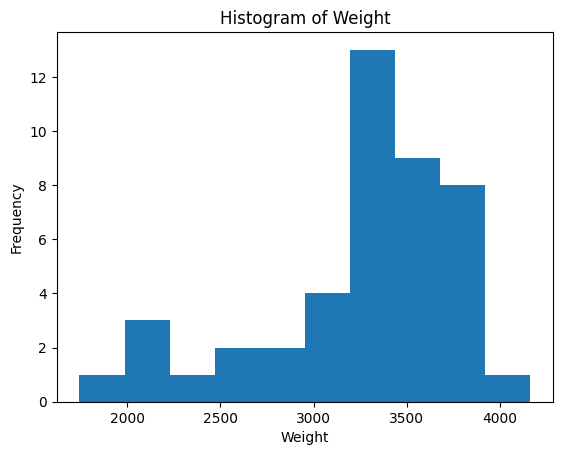

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# Suponiendo que 'babyboom.csv' es tu archivo de datos. 
# NOTA: Necesitarás el archivo CSV para hacer esto, ya que Python no tiene el paquete UsingR integrado.
df = pd.read_csv('../data/babyboom.csv')
# Gráfica un histograma de la columna 'wt'
plt.hist(df['wt'])
plt.xlabel('Weight')
plt.ylabel('Frequency')
plt.title('Histogram of Weight')
plt.show()

La media muestral del conjunto de datos $ \overline{x} $ es:

In [4]:
df['wt'].mean()


3275.9545454545455

Ahora queremos calcular la probabilidad de obtener una muestra con una media tan grande como $ 3275.955 $ bajo el supuesto de la hipótesis nula $ H_0 $.

- Del  teorema central de límite sabemos que la distribución muestral de $ \overline{X} $ sigue una distribución Normal cuando $ n $ es suficientemente grande: $ \overline{X} \sim N(\mu, \sigma^ 2/n) $.

- Si asumimos que $ H_0 $ es verdadero, entonces $ \mu=3000 $. El valor de $ n $ es 44 y el valor de $ \sigma $ se conoce en este caso y es igual a 500. 

- Calculemos el error estándar $ \frac{\sigma}{\sqrt{n} }$:

In [5]:
true_mean = 3000
sd = 500
n=df['wt'].count()
se=sd/n**0.5
se

75.3778361444409

Ahora podemos calcular la probabilidad de obtener una muestra con una media tan grande como $ 3275,955 $:

In [6]:
from scipy.stats import norm

xbar = df['wt'].mean()
# Cálculo del valor-p
pvalue = 1 - norm.cdf(xbar, loc=true_mean, scale=se)
print(pvalue)

# O alternativamente:
Z_score = (xbar - true_mean) / se
print(Z_score)

pvalue_alternative = 1 - norm.cdf(Z_score)
print(pvalue_alternative)


0.0001256405331706567
3.6609507458632065
0.0001256405331706567


### Example 2: Babies

![](../Images/pvalue1.png)


### Ejemplo 2: Bebés

La probabilidad que calculamos se llama **valor p** de la prueba.

- En este caso el valor p es muy bajo.

- Esto dice que la probabilidad de los datos es muy baja si asumimos que la hipótesis nula es cierta.

- Pero, ¿qué tan baja tiene que ser esta probabilidad antes de que podamos concluir que la hipótesis nula es falsa?

- La convención dentro de la estadística es elegir un **nivel de significancia** $ \alpha $ antes del experimento que dicte qué tan bajo debe ser el valor p antes de rechazar la hipótesis nula.

- En la práctica, muchas personas utilizan un nivel de significancia del 5% y concluyen que existe evidencia significativa en contra de la hipótesis nula si el valor p es menor o igual a 0,05.

- Un enfoque más conservador utiliza un nivel de significancia del 1% y concluye que existe evidencia significativa en contra de la hipótesis nula si el valor p es inferior a 0,01.

En nuestro ejemplo actual, el valor p es 0,00013, que es inferior a $ \alpha = 0,05 $:


In [7]:
alpha = 0.05
pvalue <= alpha

True

En este caso, concluiríamos que:
- "Existe evidencia significativa contra la hipótesis nula al nivel del 5%".
- Otra forma de decir esto es que: "rechazamos la hipótesis nula al nivel del 5%".
- Si el valor p de la prueba es mucho mayor, digamos 0,23, entonces concluiríamos que: "la evidencia contra la hipótesis nula no es significativa al nivel del 5%".
- Otra forma de decirlo es que: "no podemos rechazar la hipótesis nula al nivel del 5%".


En el ejemplo anterior, asumimos que se conocía $ \sigma $.

- En muchos casos $ \sigma $ es desconocido y debemos estimarlo usando el estimador insesgado $ s $ que vimos en la clase anterior.
- Si el tamaño de la muestra es pequeño y asumimos que los datos son normales, podemos calcular un estadístico $ T= $ $ \frac{\overline{X_{n}}-\mu_{o}}{\frac{ s}{\sqrt{n}}} $:

In [8]:
# Calcular el estadístico de t de una muestra
from scipy.stats import ttest_1samp

t_statistic, p_value = ttest_1samp(df['wt'], true_mean, axis=0)
print(t_statistic)
print(p_value)

3.4665963130955246
0.0012085244294765993


- De la lectura anterior sabemos que $ T $ sigue una distribución t-student con $ n-1 $ grados de libertad $ T \sim t_{n-1} $.
- Ahora podemos realizar una prueba T utilizando la distribución t de Student en lugar de una gaussiana.

- Puede ver que `ttest_1samp` el valor del estadístico T y el valor p de la prueba.



También rechazamos la hipótesis nula en este caso con $ \alpha = 0,05. $ 

Pero el valor p es mayor que antes. Esto se debe a que la distribución t tiene colas más anchas que la distribución Normal. 

Las colas anchas implican que hay más incertidumbre porque tuvimos que estimar $ \sigma $ y el tamaño de la muestra es relativamente pequeño.

### Calculando una región crítica

Otra forma de pensar en esta prueba es que existe una región crítica de valores tal que si el estadístico de prueba se encuentra en esta región, entonces rechazaremos $ H_0 $.
- Si la estadística de prueba se encuentra fuera de esta región, no rechazaremos $H_0$.
- En el ejemplo de los bebés, utilizando un nivel de significancia del 5%, este conjunto de valores será el 5% más extremo de los valores en la cola derecha de la distribución.
- Podemos calcular que el límite de esta región, llamado valor crítico:

In [9]:
from scipy.stats import norm
crit = norm.ppf(1 - alpha)
crit
Z_score >= crit

True

![critregion](../Images/critregion.png)

Alternativamente, usando una distribución T:

In [10]:
from scipy.stats import t
T_sta = (xbar - true_mean) / (df['wt'].std(ddof=1) / n**0.5)
crit2 = t.ppf(1 - alpha, df=n-1)
T_sta >= crit2

True

# Descripción general de NHST

En la **Prueba de significancia de hipótesis nulas (NHST)**, existen dos hipótesis principales:

1. **Hipótesis nula** $ H_{0} $:
     - Representa lo que se ha considerado real hasta el momento o cómo esperaríamos que se vieran los datos si no hubiera ningún efecto.
     - La hipótesis nula siempre implica algún tipo de igualdad (por ejemplo, $ =, \leq, \geq $).
    
2. **Hipótesis alternativa** $ H_{a} $:
     - Representa el modelo alternativo que queremos considerar o lo que esperamos si realmente hay un efecto.
     - La hipótesis alternativa siempre implica algún tipo de desigualdad (por ejemplo, $ \neq, >, < $).

Es importante tener en cuenta que la prueba de hipótesis nula opera bajo el supuesto de que la hipótesis nula es verdadera a menos que la evidencia demuestre lo contrario. La idea principal es encontrar suficiente **evidencia estadística** para rechazar $ H_{0} $ y poder concluir $ H_{a} $. Si no obtenemos suficiente evidencia estadística, **no rechazamos** $ H_{0} $.


Para realizar una prueba de hipótesis, seguimos esta metodología:

1. Especifique una hipótesis nula $ H_0 $ y una alternativa $ H_a $.
2. Establezca un nivel de significancia de la prueba $ \alpha $.
3. Recopilar datos relevantes para la hipótesis.
4. Ajuste un modelo a los datos y calcule un estadístico de prueba $ T $.
     - En pruebas paramétricas, $ T $ es un valor estandarizado (por ejemplo, una puntuación Z).
5. Evalúe la "significancia estadística" de $ T $.

Hay dos enfoques para el último paso:

- **Enfoque del valor P**: Calcula la probabilidad de observar un valor (o valores más extremos) de la estadística suponiendo que la hipótesis nula es verdadera y compárala con $ \alpha $.

- **Región crítica**: Calcula una región de valores tal que si $ T $ se encuentra en esta región entonces rechazaremos $ H_0 $.



# Más sobre los valores P

Los valores p juegan un papel crucial en la prueba de hipótesis. He aquí un vistazo en profundidad a ellos:

- Un valor p es la probabilidad de obtener un resultado **al menos tan extremo** como lo observado en los datos, asumiendo que la hipótesis nula es verdadera.
- "Extremo" se refiere a valores que se alejan de lo que predice la hipótesis nula y se acercan más a lo que sugiere la hipótesis alternativa.
- Es importante considerar todos los valores más extremos al calcular un valor p, especialmente porque la probabilidad de cualquier valor específico es cero para distribuciones continuas.
- La idea principal detrás de los valores p es determinar qué tan inusual sería nuestro resultado si la hipótesis nula fuera precisa. Cualquier resultado más extremo que nuestra observación sería aún más extraño.
- En esencia, contamos todas estas posibilidades inusuales al calcular la probabilidad de nuestro resultado bajo la hipótesis nula.



## Pruebas bilaterales

En el ejemplo anterior queríamos probar la hipótesis de la investigación de que el peso medio al nacer de los bebés australianos era superior a 3000 g. Esto sugiere que teníamos información previa de que el peso medio al nacer de los bebés australianos definitivamente no era inferior a 3000 g. Si este no fuera el caso, entonces nuestra hipótesis de investigación sería que el peso medio al nacer de los bebés australianos fue diferente de 3000 g. Esto permite la posibilidad de que el peso medio al nacer sea menor o mayor que 3000 g. Este es un ejemplo de una prueba **bilateral** a diferencia del ejemplo anterior que era una prueba **unilateral**. En este caso bilateral escribiríamos nuestras hipótesis como:


$$H_0 : \mu=3000g $$
$$H_1 : \mu\neq3000g $$


Como antes, calcularíamos nuestro estadístico de prueba como 3,66 para la distribución Normal y 3,47 para la T-student.

En este caso permitimos la posibilidad de que el valor medio sea inferior a 3000 g estableciendo nuestra región crítica como el 2,5\% más bajo y el 2,5\% más alto de la distribución. 

De esta manera, el área total de la región crítica sigue siendo 0,05 y, por tanto, el nivel de significancia $\alpha$ de nuestra prueba sigue siendo del 5\%. Los valores críticos para una prueba Z son:

In [11]:
from scipy.stats import norm

# Suponiendo que ya tienes un valor para alpha
alpha = 0.05 

# Calculando los valores críticos
crit_left = norm.ppf(alpha/2)
print(crit_left)

crit_right = norm.ppf(1 - alpha/2)
print(crit_right)


-1.9599639845400545
1.959963984540054


Por tanto, si nuestro estadístico de prueba es menor que -1,96 o mayor que 1,96 rechazaríamos la hipótesis nula. En este ejemplo, el valor del estadístico de prueba se encuentra en la región crítica, por lo que rechazamos la hipótesis nula en el nivel del 5\%.

In [12]:
# Suponiendo que ya has definido Z_score, crit_left y crit_right anteriormente

result = Z_score <= crit_left or Z_score >= crit_right
print(result)


True


## Pruebas bilaterales


![](../Images/critregion2sided.png)





Para el caso de la distribución T nuestra región crítica es:

In [13]:
from scipy.stats import t

# Suponiendo que ya tienes valores definidos para alpha y n
alpha = 0.05 
n = df['wt'].count()

# Calculando los valores críticos para la distribución t
crit2_left = t.ppf(alpha/2, df=n-1)
print(crit2_left)

crit2_right = t.ppf(1 - alpha/2, df=n-1)
print(crit2_right)

# Verificando si T_sta cae fuera del intervalo
result = T_sta <= crit2_left or T_sta >= crit2_right
print(result)


-2.0166921941428138
2.0166921941428133
True


Como $T$ está en la región de rechazo, rechazamos la hipótesis nula.

Alternativamente, podríamos calcular un intervalo de confianza para la media muestral con confianza $(1-\alpha)\%$. El intervalo de confianza se convierte en la **región de aceptación** y rechazamos $H_0$ si $\mu_0 =3000$ no está atrapado por el intervalo.

In [14]:
se_t = df['wt'].std(ddof=1) / n**0.5

# Calculando el intervalo de confianza para la media poblacional
left_conf = xbar - t.ppf(1 - alpha/2, df=n-1) * se_t
print(left_conf)

right_conf = xbar + t.ppf(1 - alpha/2, df=n-1) * se_t
print(right_conf)

# Suponiendo que ya tienes un valor para mu0
mu0 = ...  # tu valor para mu0 aquí

# Verificando si mu0 está dentro del intervalo
result = true_mean >= left_conf or true_mean <= right_conf
print(result)

3115.4180054328244
3436.4910854762666
True


Dado que $\mu_0 =3000$ no está en mi región de aceptación, rechazamos la hipótesis nula en el nivel de significancia de 0,05.

Para calcular un valor p en una prueba bilateral, debemos considerar las colas izquierda y derecha:

$$
p.valor = \Phi(-Z)+(1-\Phi(Z))=2\Phi(-|Z|)
$$

In [15]:
from scipy.stats import norm

# Cálculo del valor-p usando el primer método
pvalue = norm.cdf(-Z_score) + (1 - norm.cdf(Z_score))
print(pvalue)

# Cálculo del valor-p usando el método compacto
pvalue_compact = 2 * norm.cdf(-abs(Z_score))
print(pvalue_compact)


0.00025128106634134345
0.0002512810663413735



Observe que este valor p es mayor que el de la prueba unilateral. Esto refleja el hecho de que un valor extremo es menos sorprendente ya que podría haber ocurrido en cualquier dirección.

![Imagen de twosidepval](../Images/twosidepval.png)



Aquí $p.value$ es menor que $\alpha$, por lo que rechazamos $H_0$.




![Imagen de twosidepval_fail](../Images/twosidepval_fail.png)



Aquí $p.value$ es mayor que $\alpha$, por lo que no podemos rechazar $H_0$.

Ahora, calculemos el valor p para la prueba T:

In [16]:

# Cálculo del valor-p usando el primer método
pvalue = t.cdf(-T_sta, df=n-1) + (1 - t.cdf(T_sta, df=n-1))
print(pvalue)

# Cálculo del valor-p usando el método compacto
pvalue_compact = 2 * t.cdf(-abs(T_sta), df=n-1)
print(pvalue_compact)

0.0012085244294766013
0.0012085244294765933


In [17]:
# Realizar la prueba t
t_stat, p_value = ttest_1samp(df['wt'], 3000)
print("T-Statistic:", t_stat)
print("P-Value:", p_value)


T-Statistic: 3.4665963130955246
P-Value: 0.0012085244294765993



Esto nos proporcionará el estadístico de prueba, el valor p, el intervalo de confianza y otra información relevante para determinar si rechazamos la hipótesis nula.

## Pruebas de dos muestras no emparejadas

El conjunto de datos "babyboom" tiene una columna que especifica el sexo de cada bebé.

In [18]:
df['gender'].value_counts()

boy     26
girl    18
Name: gender, dtype: int64

- Supongamos que nuestra hipótesis de investigación es que el peso medio al nacer de los niños es diferente (bilateral) del peso medio al nacer de las niñas:

   $$H_0: \mu_{boys}=\mu_{girls} \text{ o } \mu_{boys}-\mu_{girls}=0$$
    
   $$H_1: \mu_{boys}\neq\mu_{girls} \text{ o } \mu_{boys}-\mu_{girls}\neq0$$

- A esta prueba la llamamos prueba de dos muestras (una muestra con los nacimientos de niños y otra de niñas).
- Las dos muestras son independientes o no apareadas (tenemos diferente número de observaciones para niños y niñas).
- Este tipo de pruebas son muy importantes para datos experimentales y estudios observacionales (es decir, una muestra es el grupo de control y la otra es el grupo de tratamiento).

- La teoría asintótica nos dice que la diferencia entre dos medias muestrales (cuando los tamaños de muestra son suficientemente grandes) tiene una distribución muestral Normal:

 $$\overline{X}_{1}-\overline{X}_{2} \sim N\left(0, \frac{\sigma_1^{2}}{n_1} + \frac{\sigma_2^{ 2}}{n_2}\right)$$

- Cuando se desconocen las desviaciones estándar de cada grupo ($\sigma_1$, $\sigma_2$) podemos estimarlas como siempre ($s_1$,$s_2$) y construir las siguientes estadísticas $T$:

 $$T = \frac{ \overline{X}_{1}-\overline{X}_{2}}{\sqrt{\frac{s_1^{2}}{n_1} + \frac{s_2^{ 2}}{n_2}}}$$

- El estadístico $T$ se distribuye según una distribución t-student.

- Cuando los grupos son del mismo tamaño y tienen igual varianza, los grados de libertad para la prueba $T$ son $n_1+n_2-2$.
- En este caso, el diagrama de caja muestra que el grupo de "niñas" es más variable que el grupo de "niños".
- También sabemos que el número de observaciones en cada grupo es diferente.


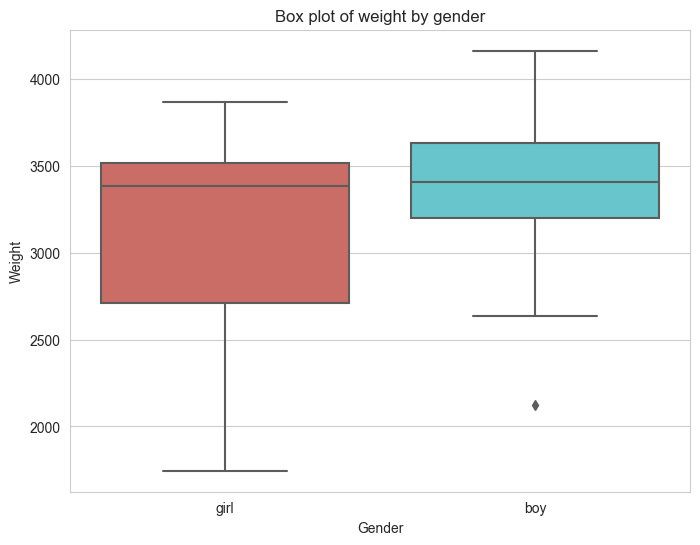

In [25]:

import seaborn as sns
import matplotlib.pyplot as plt

#crear un boxplot para cada genero de la base de datos df
sns.set_style("whitegrid")
plt.figure(figsize=(8,6))
sns.boxplot(x='gender', y='wt', data=df, palette='hls')
plt.title('Box plot of weight by gender')
plt.suptitle('')  # Esto es para remover el título automático que Pandas pone
plt.xlabel('Gender')
plt.ylabel('Weight')
plt.show()




- Necesitamos utilizar una fórmula más compleja para los grados de libertad, a la que a menudo se hace referencia como "prueba t de Welch":

    $$d.f. = \frac{\left(\frac{s_1^{2}}{n_1} + \frac{s_2^{2}}{n_2}\right)^2}{\frac{(s_1^2/n_1)^ 2}{n_1-1}+\frac{(s_2^2/n_2)^2}{n_2-1}}$$

- Para este ejemplo d.f. = 27,631, que es inferior a lo que obtendríamos restando 2 del tamaño de la muestra.
- Recuerde que cuanto menor es el d.f, más anchas son las colas en la distribución t-student.
- Esto consiste esencialmente en imponer una penalización a la prueba por diferencias en el tamaño o la varianza de la muestra.


In [20]:
from scipy.stats import ttest_ind
# Separar los datos por género
group_girl = df[df['gender'] == 'girl']['wt']
group_boy = df[df['gender'] == 'boy']['wt']

# Realizar la prueba t para dos muestras independientes
t_stat, p_value = ttest_ind(group_girl, group_boy, equal_var=False)  # 'equal_var=False' realiza la prueba t de Welch

print("T-Statistic:", t_stat)
print("P-Value:", p_value)
print("Mean in group girl:", group_girl.mean())
print("Mean in group boy:", group_boy.mean())



T-Statistic: -1.4210557069307492
P-Value: 0.16648882032684822
Mean in group girl: 3132.4444444444443
Mean in group boy: 3375.3076923076924


- En este caso, no logramos rechazar $H_0$ en el nivel de significancia $5\%$.

## Pruebas de dos muestras emparejadas

- Otro tipo muy útil de prueba de dos muestras es la prueba T pareada.
- Esta prueba se utiliza para comparar las medias entre dos **grupos relacionados** de muestras.
- Aquí tenemos dos valores (es decir, un par de valores) para las mismas muestras.
- Este tipo de datos surge cuando comparamos una variable de respuesta después y antes de un tratamiento para cada sujeto.
- También surge en experimentos de parejas emparejadas.
- El análisis de la prueba t pareada se realiza de la siguiente manera:
     1. Calcula la diferencia $d$ entre cada par de valores.
     2. Calcula la media $\overline{d}$ y la desviación estándar $s_d$ de estas diferencias.
     3. Compara $\overline{d}$ con 0 de la misma manera que en las pruebas anteriores.


- Las estadísticas de la prueba $T$ se calculan de la siguiente manera para la prueba pareada:

     $$T = \frac{\overline{d}}{s_d/\sqrt{n}}$$

- Los grados de libertad (df) son simplemente $n-1$.


Como ejemplo, 20 ratones recibieron un tratamiento X durante 3 meses.
- Queremos saber si el tratamiento X tiene impacto en el peso de los ratones.
- Se ha medido el peso de los 20 ratones antes y después del tratamiento.
- Probemos las siguientes hipótesis:

     $$H_0: \overline{d}=0$$
    
     $$H_1: \overline{d}\neq0$$

Podemos ejecutar una prueba t pareada en Python de la siguiente manera:

In [21]:
from scipy.stats import ttest_rel
import numpy as np

# Peso de los ratones antes del tratamiento
before = np.array([200.1, 190.9, 192.7, 213, 241.4, 196.9, 172.2,
                   185.5, 205.2, 193.7])

# Peso de los ratones después del tratamiento
after = np.array([392.9, 393.2, 345.1, 393, 434, 427.9, 422,
                  383.9, 392.3, 352.2])

# Realizar la prueba t pareada
t_stat, p_value = ttest_rel(after, before)

print("T-Statistic:", t_stat)
print("P-Value:", p_value)
print("Mean of the differences:", after.mean() - before.mean())



T-Statistic: 20.8831333638503
P-Value: 6.200298210361319e-09
Mean of the differences: 194.48999999999995


# errores

- Tenemos dos tipos de errores cuando realizamos una prueba de hipótesis.
- Error tipo I: es cuando rechazamos la hipótesis nula cuando era cierta (también llamado “falsa alarma”).
- Error tipo II: es cuando la hipótesis nula es falsa pero no tenemos evidencia estadística para rechazarla (también llamado “miss”).


|               | Retain $H_0$ | Reject $H_{0}$ |
|---------------|----------------|------------------|
| $H_0$ true  | ✅              | type I error     |
| $H_1$ true  | type II error  | ✅                |



- Jerzy Neyman y Egon Pearson, dos estadísticos muy influyentes del siglo XX, acuñaron dos términos para describir la probabilidad de estos dos tipos de errores a largo plazo:
     - $P(\text{Error tipo I}) = \alpha$
     - $P(\text{Error tipo II}) = \beta$



![Neyman y Pearson](../Images/neymanpearson.jpg)




- Si configuramos $\alpha$ en .05, entonces a largo plazo deberíamos cometer un error de Tipo I el 5% de las veces.
- El valor estándar para un nivel aceptable de $\beta$ es .2.
- Es decir, estamos dispuestos a aceptar que el 20% de las veces no lograremos detectar un efecto verdadero cuando realmente existe.
- El concepto de **poder estadístico** es el complemento del error Tipo II:
     $$
     \text{potencia} = 1 - \beta
     $$
- El poder de una prueba es la probabilidad de encontrar un resultado positivo dado que existe (Poldrack, 2019).
- Para mitigar los errores de tipo I, generalmente utilizamos valores más pequeños de $\alpha$.
- Para mitigar los errores de tipo II (o aumentar la potencia del test) generalmente trabajamos con muestras más grandes.
- Existe una compensación entre los errores de tipo I y tipo II.
- Existen herramientas para analizar la potencia de un test que van más allá del alcance de este curso.





# ¿Qué significa un resultado significativo?

- Existe una gran confusión sobre lo que realmente significan los valores p.
- Supongamos que hacemos un experimento comparando las medias entre condiciones y encontramos una diferencia con un valor de p de .01.
     - ¿Significa que la probabilidad de que la hipótesis nula sea cierta es .01?
         - No. Recuerde que en NHST, el valor p es la probabilidad de los datos dada la hipótesis nula: $P(\text{data}|H_0)$.
         - No garantiza conclusiones sobre la probabilidad de la hipótesis nula dados los datos: $P(H_0|\text{data})$.
     - ¿Significa que la probabilidad de que estés tomando la decisión equivocada es de .01?
         - No. Esto sería $P(H_0|\text{data})$, pero recuerde como arriba que los valores p son probabilidades de datos bajo $H_0$, no probabilidades de hipótesis.

- ¿Significa que ha encontrado un efecto prácticamente importante?
     - No. Existe una distinción esencial entre significación estadística y significación práctica.
     - La pérdida de una onza (es decir, el peso de unas cuantas patatas fritas) puede ser estadísticamente significativa pero no prácticamente significativa.
- Muchos científicos piensan que la NHST tiene fallas y que ha sido la causa de serios problemas en la ciencia (Poldrack, 2019).
     - Por ejemplo, la Asociación Estadounidense de Estadística (ASA) publicó una "Declaración sobre la importancia estadística y los valores P" que indica el uso y la interpretación adecuados del valor p (Wasserstein, 2016).



# Hay muchas otras pruebas.

Hay una gran cantidad de otras pruebas que no enseñaremos en este curso:

- Pruebas de proporciones.
- La prueba exacta de Fisher.
- Análisis de Varianza (ANOVA).
- Las pruebas de independencia Chi-cuadrado.
- La prueba de rangos con signo de Wilcoxon.
- La prueba de Kolmogorov-Smirnov.


# Conclusiones

- En esta clase hemos introducido dos conceptos estadísticos importantes: diseño de experimentos y NHST.
- Los experimentos son un enfoque poderoso para determinar las relaciones causa-efecto.
- Es muy importante identificar y controlar las variables de confusión en el diseño de experimentos.
- La prueba de hipótesis es una familia de técnicas para probar hipótesis utilizando datos.
- NHST debe usarse con cuidado y siempre debemos recordar que los valores p no miden la probabilidad de una hipótesis determinada.
